<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/Visualiza%C3%A7%C3%A3o_dos_Custos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.metrics import  MeanRelativeError

In [31]:
#Carregando o dataset e separando em teste e treino
df = pd.read_csv('data_cov.csv')
y = df['cov']
x = df.drop('cov', axis = 1)

x_treino, x_teste = x[0:86], x[86:]
y_treino, y_teste = y[0:86], y[86:]
'''
x_treino.insert(5, 'Cov',y_treino)
x_treino = x_treino.sort_values(by='flow_distance_ratio')

y_treino = x_treino['Cov']
x_treino = x_treino.drop('Cov', axis = 1)
'''
scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

In [32]:
funcoes = ['tanh', 'relu', 'sigmoid', 'LeakyReLU']
taxas = [0.005, 0.01, 0.05]

In [33]:
def modelo_RNA(x, activation, nos, camadas_ocultas):
  modelo = Sequential()
  modelo.add(tf.keras.layers.Input(shape=(x.shape[1],)))
  #modelo.add(keras.layers.Dense(nos, activation='relu', input_shape=x.shape))
  for i in range(camadas_ocultas):
    modelo.add(keras.layers.Dense(nos, activation=activation))
    modelo.add(keras.layers.Dropout(0.2))
  modelo.add(keras.layers.Dense(1, activation= 'linear'))
  modelo.summary()

  return modelo

def treino_modelo(modelo, optimizer, loss, metrics, x_treino, y_treino, x_teste, y_teste, itr):
  modelo.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  resultado = modelo.fit(x_treino, y_treino, epochs=itr, batch_size=5, validation_data=(x_teste, y_teste))

  return resultado, modelo

def erro_relativo(y_pred, y_true):
  return np.mean(np.abs((y_true - y_pred) / y_true))

In [34]:
resultados = list()
erros_relativos = list()
for i in funcoes:
  #modelo = modelo_RNA(x_treino, i, 40, 11)
  for j in taxas:
      otimizador = tf.keras.optimizers.Adam(learning_rate=j)
      modelo = modelo_RNA(x_treino, i, 40, 11)
      resultado, modelo = treino_modelo(modelo, 'adam', 'mse', ['mae'], x_treino, y_treino, x_teste, y_teste, 350)
      resultado = pd.DataFrame(resultado.history)
      resultados.append(resultado)
      y_pred = modelo.predict(x_treino)
      y_pred = pd.DataFrame(y_pred)
      erro = erro_relativo(y_pred, y_treino)
      erros_relativos.append(erro)
      '''
      plt.plot(resultado.history['loss'])
      plt.plot(resultado.history['val_loss'])
      plt.title('Histórico de Treinamento')
      plt.ylabel('Loss (MSE)')
      plt.xlabel('Épocas de treinamento')
      plt.legend(['Erro treino', 'Erro teste'])
      plt.show()
      '''

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_636 (Dense)           (None, 40)                240       
                                                                 
 dropout_573 (Dropout)       (None, 40)                0         
                                                                 
 dense_637 (Dense)           (None, 40)                1640      
                                                                 
 dropout_574 (Dropout)       (None, 40)                0         
                                                                 
 dense_638 (Dense)           (None, 40)                1640      
                                                                 
 dropout_575 (Dropout)       (None, 40)                0         
                                                                 
 dense_639 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_648 (Dense)           (None, 40)                240       
                                                                 
 dropout_584 (Dropout)       (None, 40)                0         
                                                                 
 dense_649 (Dense)           (None, 40)                1640      
                                                                 
 dropout_585 (Dropout)       (None, 40)                0         
                                                                 
 dense_650 (Dense)           (None, 40)                1640      
                                                                 
 dropout_586 (Dropout)       (None, 40)                0         
                                                                 
 dense_651 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_660 (Dense)           (None, 40)                240       
                                                                 
 dropout_595 (Dropout)       (None, 40)                0         
                                                                 
 dense_661 (Dense)           (None, 40)                1640      
                                                                 
 dropout_596 (Dropout)       (None, 40)                0         
                                                                 
 dense_662 (Dense)           (None, 40)                1640      
                                                                 
 dropout_597 (Dropout)       (None, 40)                0         
                                                                 
 dense_663 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_672 (Dense)           (None, 40)                240       
                                                                 
 dropout_606 (Dropout)       (None, 40)                0         
                                                                 
 dense_673 (Dense)           (None, 40)                1640      
                                                                 
 dropout_607 (Dropout)       (None, 40)                0         
                                                                 
 dense_674 (Dense)           (None, 40)                1640      
                                                                 
 dropout_608 (Dropout)       (None, 40)                0         
                                                                 
 dense_675 (Dense)           (None, 40)              

3/3 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_684 (Dense)           (None, 40)                240       
                                                                 
 dropout_617 (Dropout)       (None, 40)                0         
                                                                 
 dense_685 (Dense)           (None, 40)                1640      
                                                                 
 dropout_618 (Dropout)       (None, 40)                0         
                                                                 
 dense_686 (Dense)           (None, 40)                1640      
                                                                 
 dropout_619 (Dropout)       (None, 40)                0         
                                                                 
 dense_687 (Dense)           (None, 40)              

3/3 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_696 (Dense)           (None, 40)                240       
                                                                 
 dropout_628 (Dropout)       (None, 40)                0         
                                                                 
 dense_697 (Dense)           (None, 40)                1640      
                                                                 
 dropout_629 (Dropout)       (None, 40)                0         
                                                                 
 dense_698 (Dense)           (None, 40)                1640      
                                                                 
 dropout_630 (Dropout)       (None, 40)                0         
                                                                 
 dense_699 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_708 (Dense)           (None, 40)                240       
                                                                 
 dropout_639 (Dropout)       (None, 40)                0         
                                                                 
 dense_709 (Dense)           (None, 40)                1640      
                                                                 
 dropout_640 (Dropout)       (None, 40)                0         
                                                                 
 dense_710 (Dense)           (None, 40)                1640      
                                                                 
 dropout_641 (Dropout)       (None, 40)                0         
                                                                 
 dense_711 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_720 (Dense)           (None, 40)                240       
                                                                 
 dropout_650 (Dropout)       (None, 40)                0         
                                                                 
 dense_721 (Dense)           (None, 40)                1640      
                                                                 
 dropout_651 (Dropout)       (None, 40)                0         
                                                                 
 dense_722 (Dense)           (None, 40)                1640      
                                                                 
 dropout_652 (Dropout)       (None, 40)                0         
                                                                 
 dense_723 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_732 (Dense)           (None, 40)                240       
                                                                 
 dropout_661 (Dropout)       (None, 40)                0         
                                                                 
 dense_733 (Dense)           (None, 40)                1640      
                                                                 
 dropout_662 (Dropout)       (None, 40)                0         
                                                                 
 dense_734 (Dense)           (None, 40)                1640      
                                                                 
 dropout_663 (Dropout)       (None, 40)                0         
                                                                 
 dense_735 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_744 (Dense)           (None, 40)                240       
                                                                 
 dropout_672 (Dropout)       (None, 40)                0         
                                                                 
 dense_745 (Dense)           (None, 40)                1640      
                                                                 
 dropout_673 (Dropout)       (None, 40)                0         
                                                                 
 dense_746 (Dense)           (None, 40)                1640      
                                                                 
 dropout_674 (Dropout)       (None, 40)                0         
                                                                 
 dense_747 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_756 (Dense)           (None, 40)                240       
                                                                 
 dropout_683 (Dropout)       (None, 40)                0         
                                                                 
 dense_757 (Dense)           (None, 40)                1640      
                                                                 
 dropout_684 (Dropout)       (None, 40)                0         
                                                                 
 dense_758 (Dense)           (None, 40)                1640      
                                                                 
 dropout_685 (Dropout)       (None, 40)                0         
                                                                 
 dense_759 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_768 (Dense)           (None, 40)                240       
                                                                 
 dropout_694 (Dropout)       (None, 40)                0         
                                                                 
 dense_769 (Dense)           (None, 40)                1640      
                                                                 
 dropout_695 (Dropout)       (None, 40)                0         
                                                                 
 dense_770 (Dense)           (None, 40)                1640      
                                                                 
 dropout_696 (Dropout)       (None, 40)                0         
                                                                 
 dense_771 (Dense)           (None, 40)              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [35]:
resultados

[         loss       mae  val_loss   val_mae
 0    0.198609  0.357544  0.006729  0.079107
 1    0.115094  0.266635  0.000689  0.018063
 2    0.121010  0.272496  0.008941  0.092018
 3    0.066210  0.209672  0.000475  0.014579
 4    0.082080  0.220151  0.001921  0.038043
 ..        ...       ...       ...       ...
 345  0.004487  0.030542  0.001865  0.037303
 346  0.004146  0.029669  0.002004  0.039121
 347  0.003643  0.026968  0.002727  0.047479
 348  0.003525  0.032702  0.003523  0.055219
 349  0.004368  0.027134  0.001084  0.026064
 
 [350 rows x 4 columns],
          loss       mae  val_loss   val_mae
 0    0.196549  0.340449  0.000502  0.017862
 1    0.142904  0.288283  0.001446  0.031523
 2    0.091396  0.235260  0.003411  0.055094
 3    0.077236  0.222933  0.000688  0.020236
 4    0.062362  0.204886  0.016243  0.125728
 ..        ...       ...       ...       ...
 345  0.004224  0.026934  0.002336  0.043187
 346  0.003700  0.025233  0.002506  0.045097
 347  0.003967  0.025602  0.

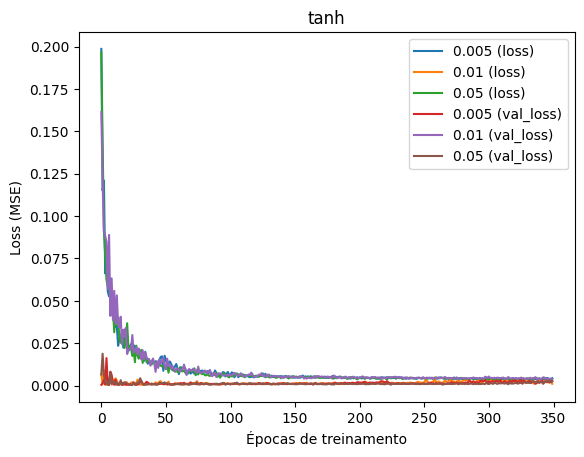

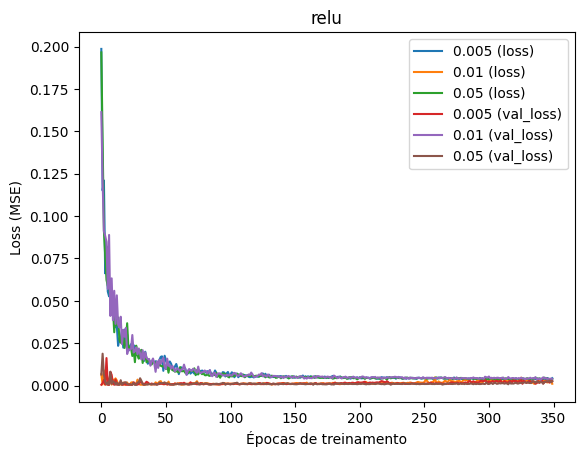

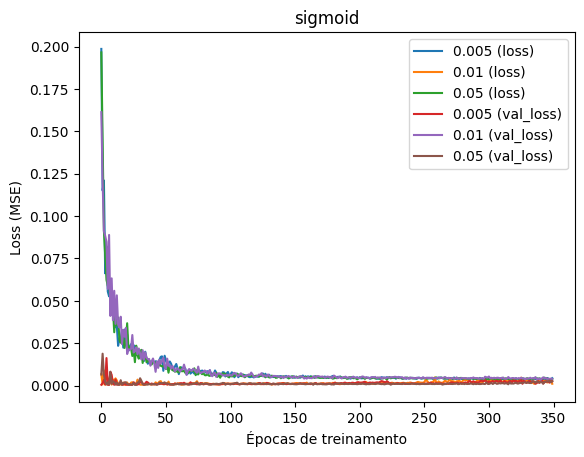

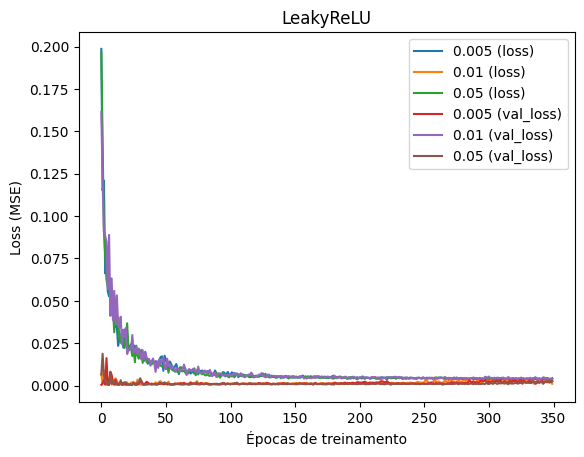

In [36]:
for i in range(0, len(funcoes)):
  for j in range(0, len(taxas)):
    plt.plot(resultados[j]['loss'])
    plt.plot(resultados[j]['val_loss'])
  plt.title(funcoes[i])
  plt.ylabel('Loss (MSE)')
  plt.xlabel('Épocas de treinamento')
  plt.legend(['0.005 (loss)', '0.01 (loss)', '0.05 (loss)', '0.005 (val_loss)', '0.01 (val_loss)', '0.05 (val_loss)'])
  plt.show()